# Wine Quality Analysis(Rachael Olomo)

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
sns.set()

In [2]:
df_1 = pd.read_csv("winequality.txt")
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# gives the number of columns present, identifies any missing data;'non-null', identifies the data type for each column, gives the shape of the dataset

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#number of rows and columns
df_1.shape

(1599, 12)

## Checking Missing Values

In [5]:
#  checking for missing data (further exploration)
df_1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Knowing the count for our target data as shown below.
df_1.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Checking For Outliers

In [7]:
# statistical description of data
df_1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Applying the 1.5 rule we see that there are outliers in the dataset.

## Several machine learning algorithms make the assumption that the data follow a normal (or Gaussian) distribution. This is easy to check with the skewness value, which explains the extent to which the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.

In [8]:
print(df_1.skew())

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64


Based on this analysis we could assueme that residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, and sulphates have been identified as the feastures with outliers, but let us graph it to see if this is true

## Checking for Outliers & Data Visualization (1)





                                                                       Columns with Outliers









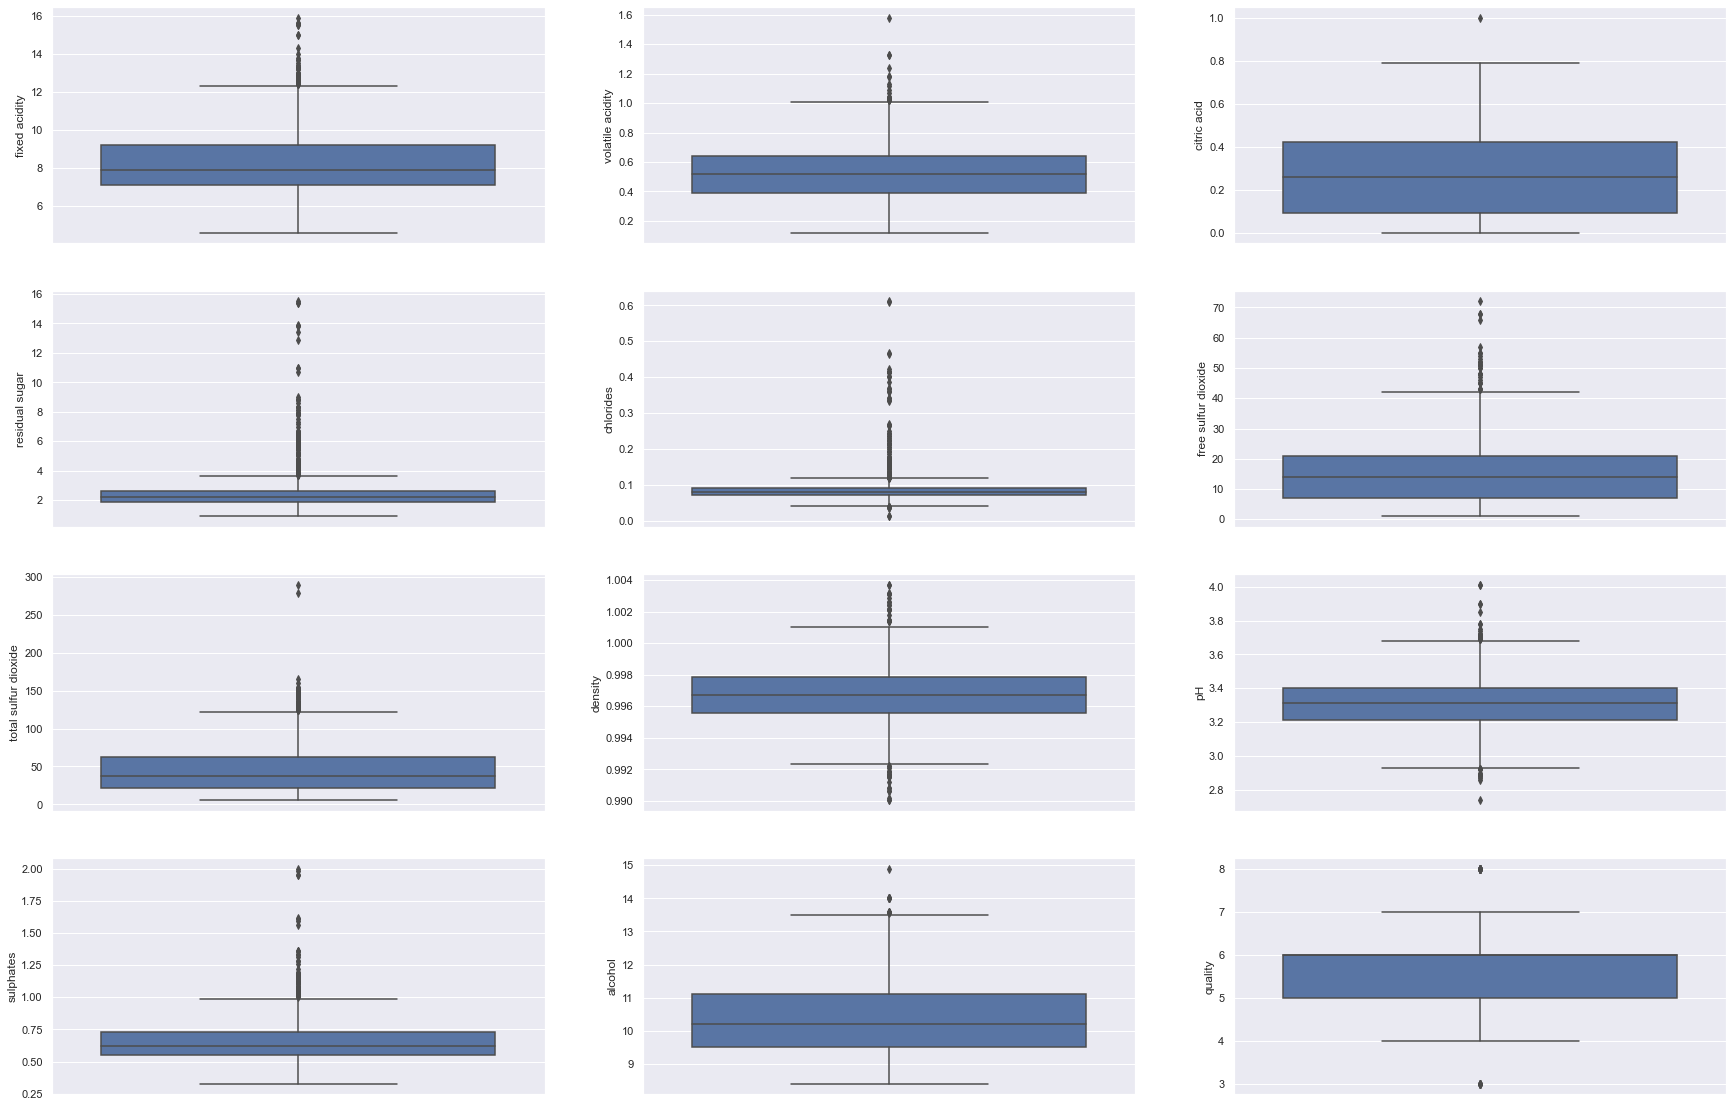

In [9]:
fig, axes = plt.subplots(4,3, figsize=(30, 20),squeeze=False)
axes = axes.flatten()
print('\n'*3)
print(' '*70, 'Columns with Outliers')
print('\n'*6)
for pl,col in enumerate(list(df_1.columns.values)):
    sns.boxplot(ax=axes[pl], data =df_1, y=col)
    

Based on the graphical analysis we can see that all columns contain outliers

## Dealing with Outliers

#### Looking at the Distribution of the Data Before Dealing with the Outliers

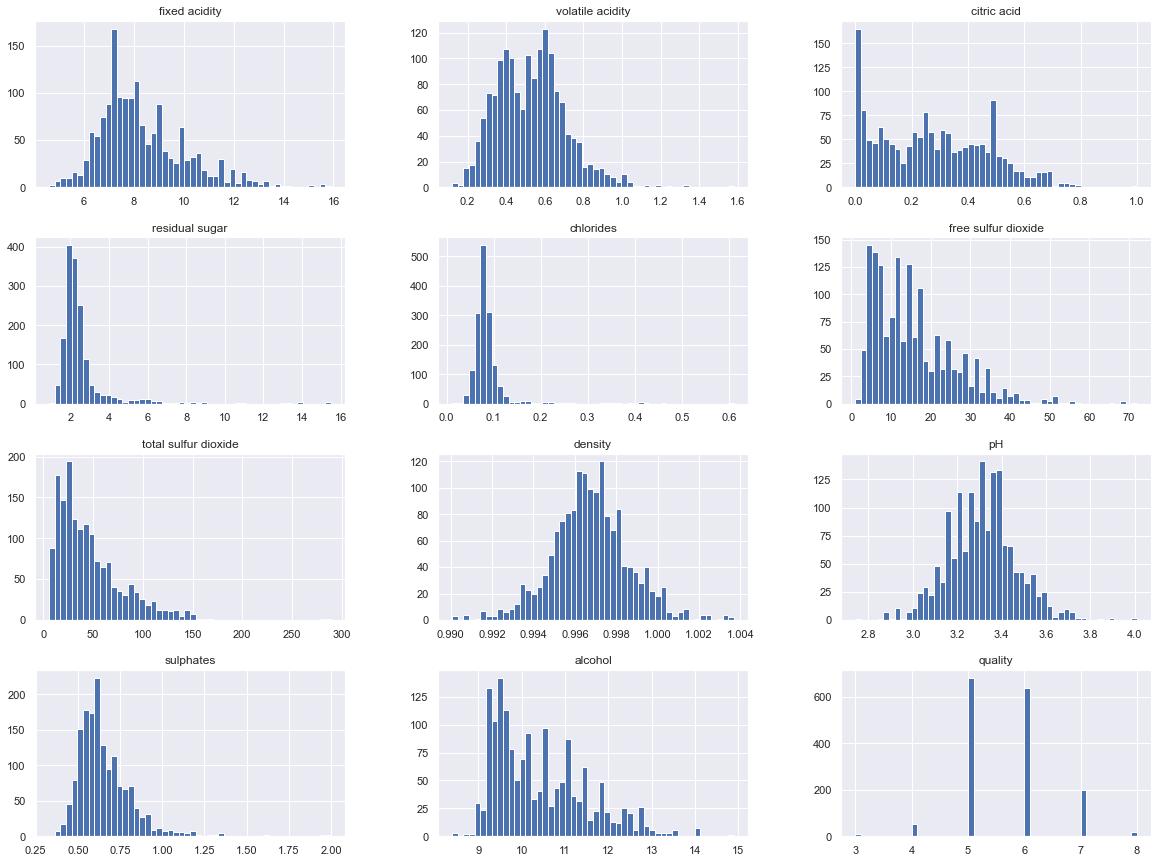

In [10]:
import matplotlib.pyplot as plt
df_1.hist(bins = 50, figsize = (20,15));


From the various histogram plots above we see that most of the data is right skewed. Focusing on Fixed Acidity we see that 50% of the data is roughly between 6.5 and 7.5.

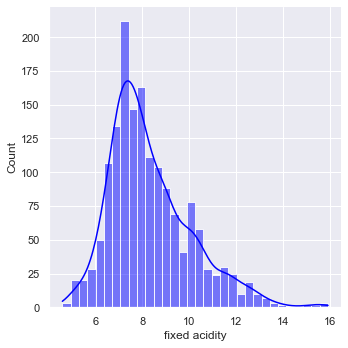

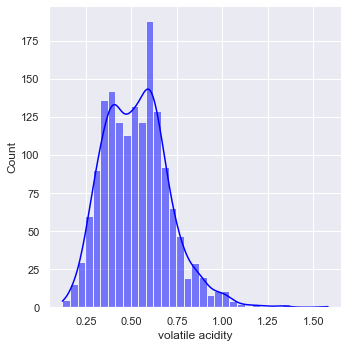

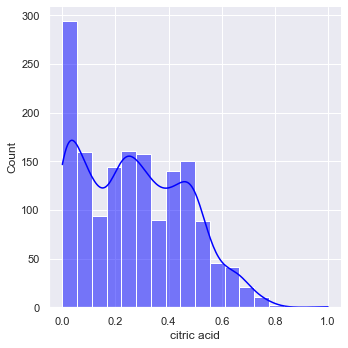

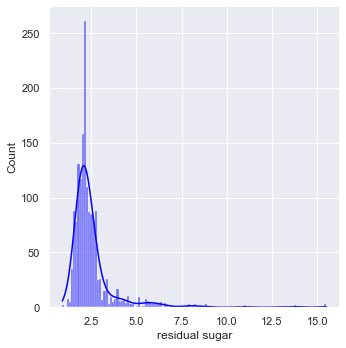

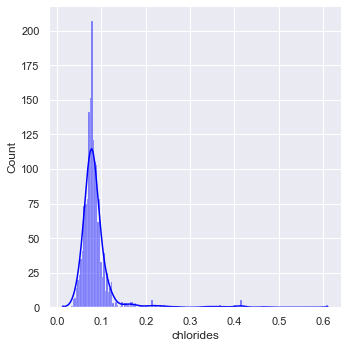

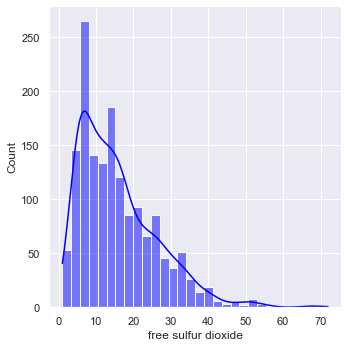

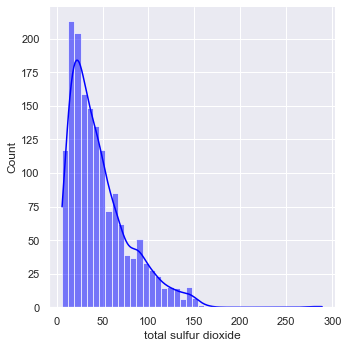

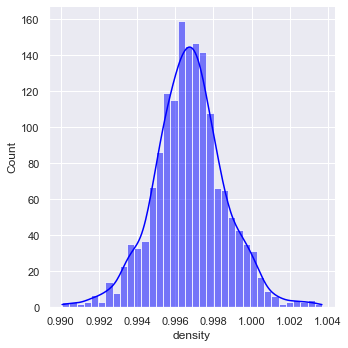

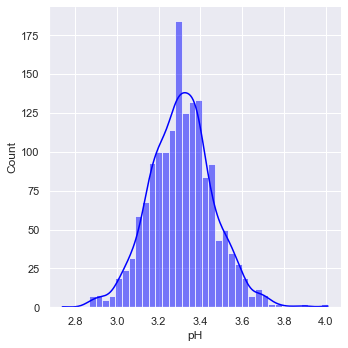

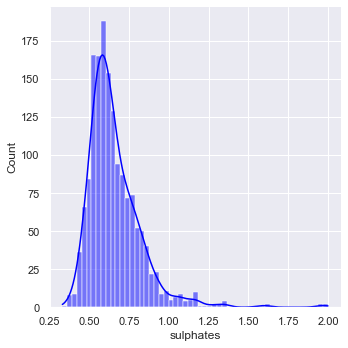

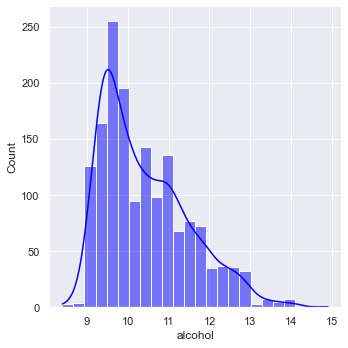

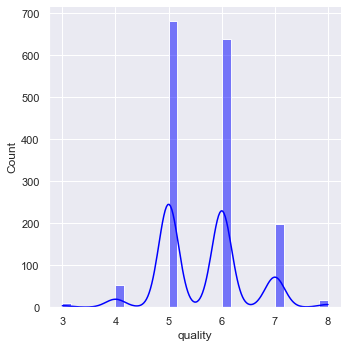

In [11]:
for col in list(df_1.columns.values):
    sns.displot(data = df_1, x=col,kde=True, color = 'blue');

## Applying Outlier Removal Function (Based on the 1.5 Rule)

In [12]:

def outlier(data):
    
    counter = 0
    counter2 = 0
    counter3 = 1
    data_Dict = {}
    quantile_dict = {}
    
    #Creating the 25% and 75% quantile, I excluded the last column because that is the result column
    Q1 = [data[i].quantile([0.25]) for i in data.columns.values if i != data.columns.values[-1]]
    Q3 = [data[i].quantile([0.75]) for i in data.columns.values if i != data.columns.values[-1]]

    for i in range(len(Q1)):
        quantile_dict[Q1[i].name] = [float(Q3[i].values),float(Q1[i].values)]
    
    #Creating the Inter-quantile Range
    IQ_R = [value[0] - value[1] for value in quantile_dict.values()]
    
    #Creating the minimum and maximum thresold values
    out_liers = {'lower_outlier_thresold': [ float(Q1[i] - (IQ_R[i]*1.5)) for i in range(len(Q1))],
                 'upper_outlier_thresold': [ float(Q3[i] + (IQ_R[i]*1.5)) for i in range(len(Q1))]}
    
    columns = [i for i  in data.columns.values if i != data.columns.values[-1]]
    out_Data = pd.DataFrame(out_liers, index = columns)

    #Creating the new dataset without the outliers from the previous dataset
    for i in data.columns.values:
        if i != data.columns.values[-1]:

            min_edge = out_Data.iloc[:,counter][counter2]
            max_edge = out_Data.iloc[:,counter3][counter2]

            val = data[((data[i] >= min_edge) & (data[i] <= max_edge))]
            data_Dict[i] = val[i]
            counter2+=1
            
    df_2 = pd.DataFrame(data_Dict)
    df_2[data.columns.values[-1]] = data.iloc[:,-1]
    return(df_2)


df2 = outlier(df_1)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## After Removing Outliers

In [13]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1550.000000,1580.000000,1598.000000,1444.000000,1487.000000,1569.000000,1544.000000,1554.000000,1564.000000,1540.000000,1586.000000,1599.000000
mean,8.162581,0.520554,0.270519,2.179848,0.078756,15.186106,42.997409,0.996735,3.308772,0.636416,10.394378,5.636023
std,1.513582,0.166581,0.194006,0.449141,0.014865,9.226586,27.214797,0.001667,0.140498,0.120963,1.021412,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.992350,2.930000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995620,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.100000,0.078000,13.000000,37.000000,0.996745,3.310000,0.620000,10.100000,6.000000
75%,9.100000,0.630000,0.420000,2.500000,0.087000,21.000000,59.000000,0.997800,3.400000,0.710000,11.000000,6.000000
max,12.300000,1.010000,0.790000,3.650000,0.119000,42.000000,122.000000,1.001000,3.680000,0.990000,13.500000,8.000000






                                                   After Applying Outlier Removal Function









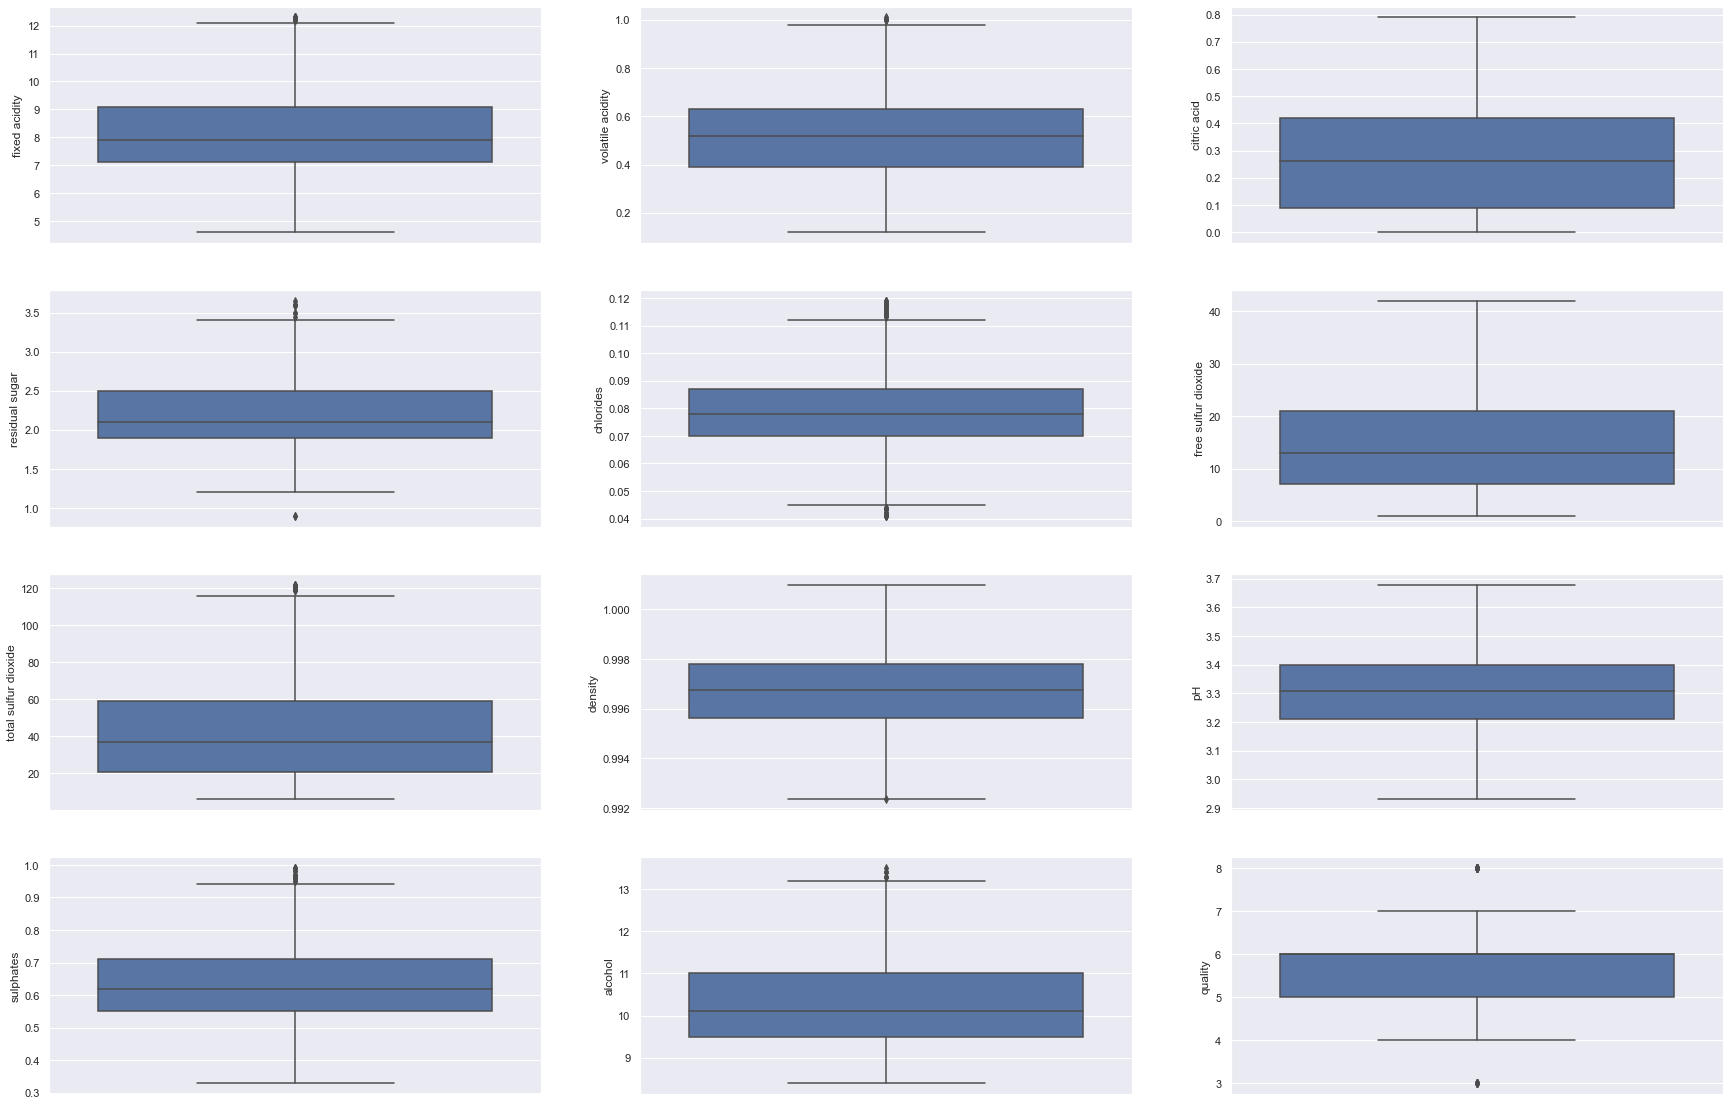

In [14]:
fig, axes = plt.subplots(4,3, figsize=(30, 20),squeeze=False)
axes = axes.flatten()
print('\n'*3)
print(' '*50, 'After Applying Outlier Removal Function')
print('\n'*6)
for pl,col in enumerate(list(df2.columns.values)):
    sns.boxplot(ax=axes[pl], data =df2, y=col)

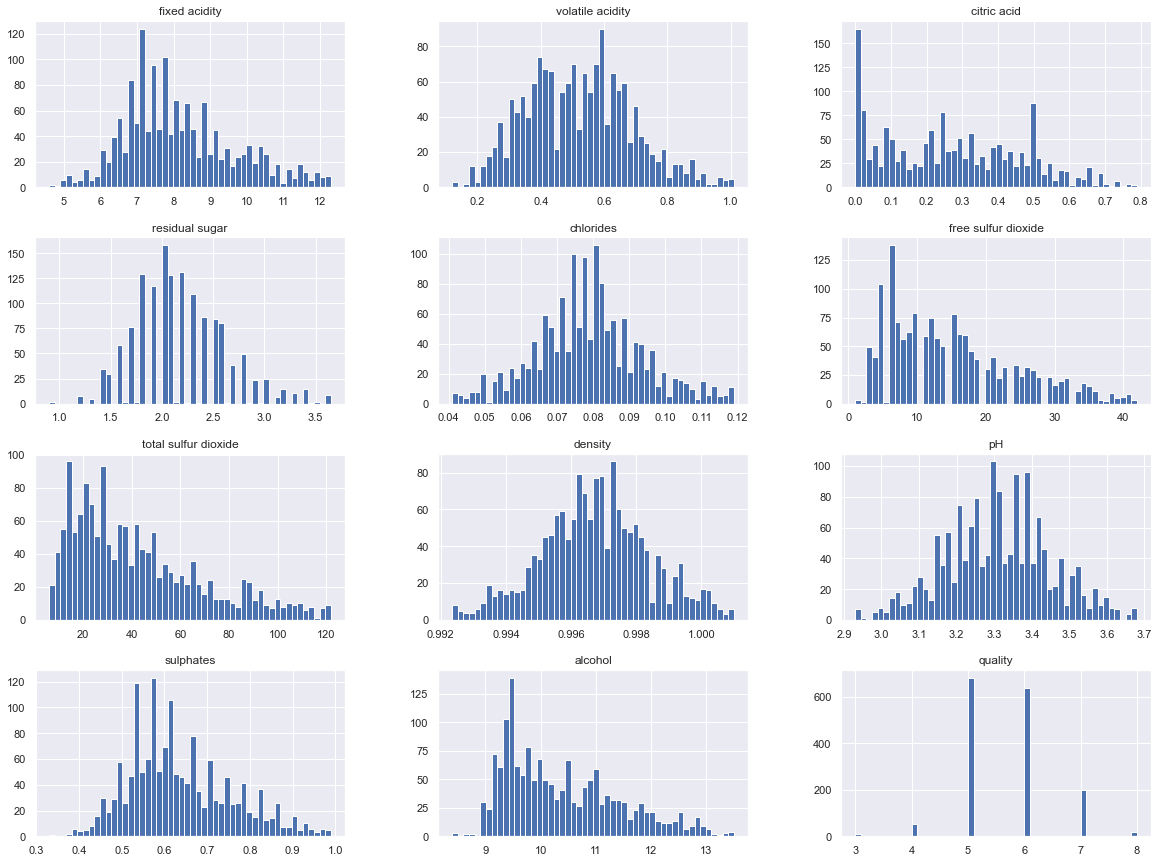

In [15]:
import matplotlib.pyplot as plt
df2.hist(bins = 50, figsize = (20,15));


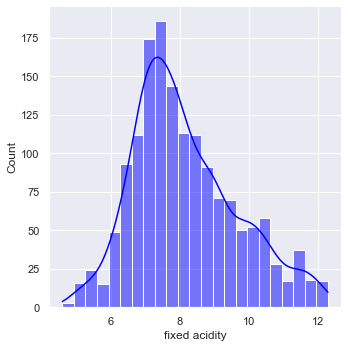

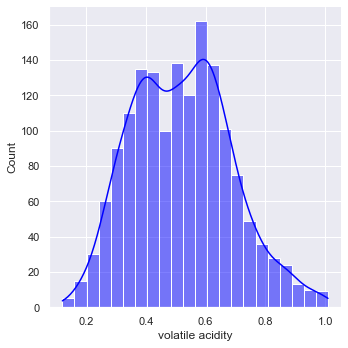

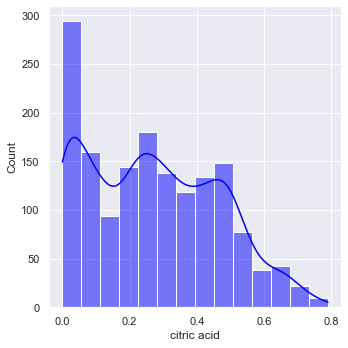

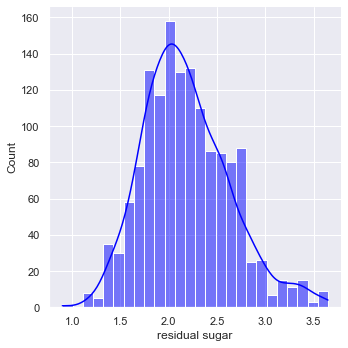

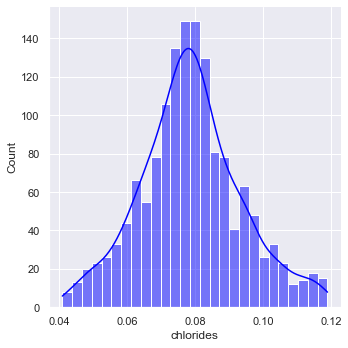

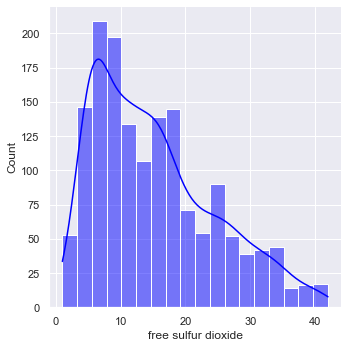

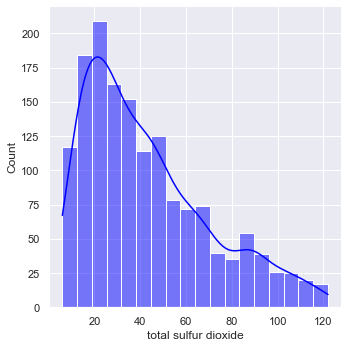

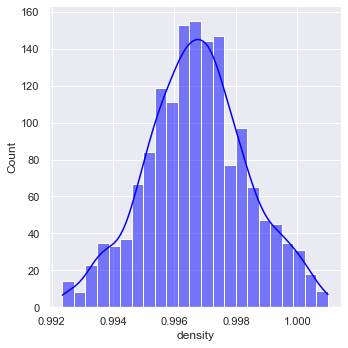

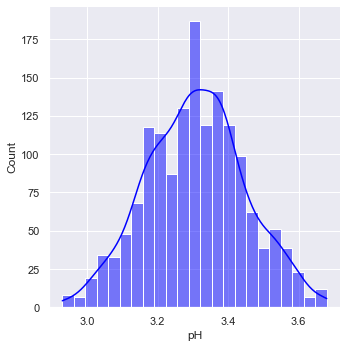

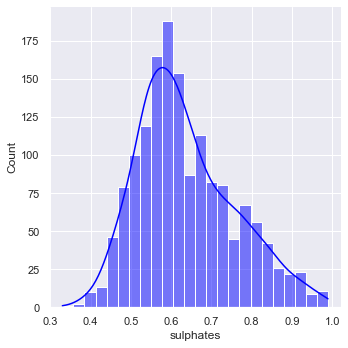

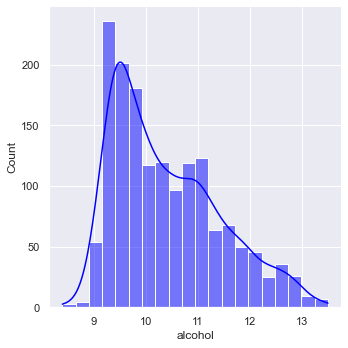

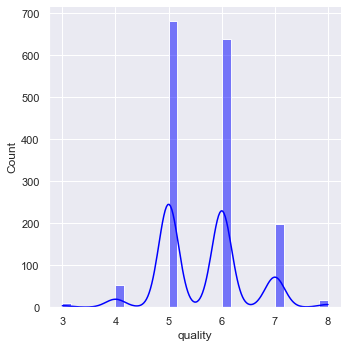

In [16]:
for col in list(df2.columns.values):
    sns.displot(data = df2, x=col,kde=True, color = 'blue');

In [17]:
print(df2.skew())

fixed acidity           0.590427
volatile acidity        0.287882
citric acid             0.296267
residual sugar          0.578107
chlorides               0.191685
free sulfur dioxide     0.780793
total sulfur dioxide    0.915336
density                 0.019082
pH                      0.030785
sulphates               0.586399
alcohol                 0.732240
quality                 0.217802
dtype: float64


#### As shown from the analysis; the skewness of the data has been reduced but the shape of the data is the same

## Data Visualization (2)

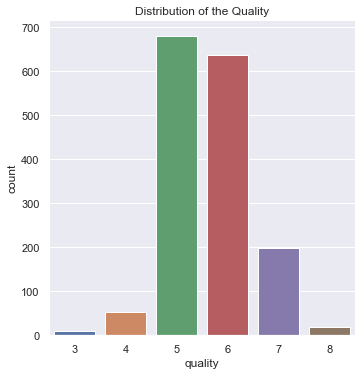

In [18]:
sns.catplot(x='quality', data=df_1, kind='count');
plt.title('Distribution of the Quality');

We see in the graph above that the quality of wine that appears most in the data set is 6

## Correlation Analysis

In [19]:
corr_matrix = df2.corr()

In [20]:
# input features that correlate with quality; our target value
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.471024
sulphates               0.394065
citric acid             0.232439
fixed acidity           0.113414
residual sugar          0.038105
free sulfur dioxide    -0.047868
pH                     -0.077170
density                -0.167323
chlorides              -0.168764
total sulfur dioxide   -0.173732
volatile acidity       -0.363475
Name: quality, dtype: float64

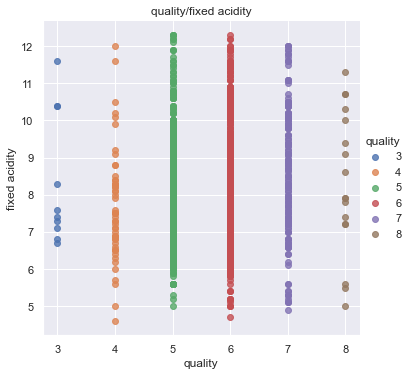

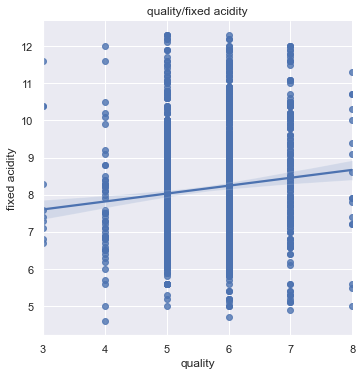

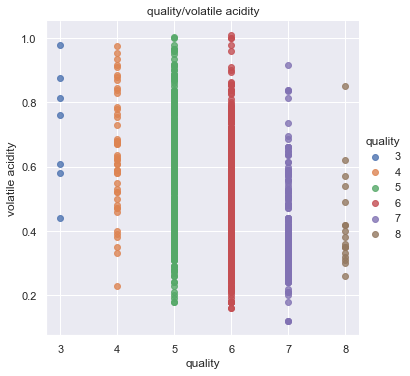

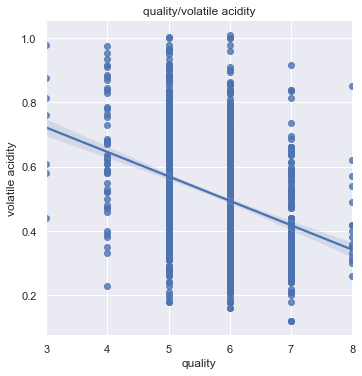

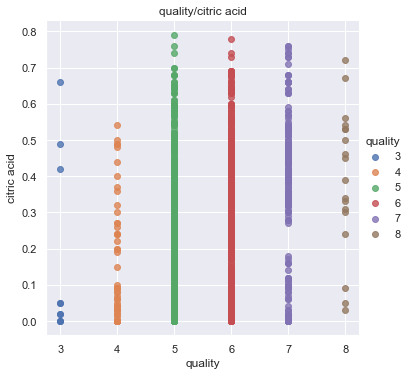

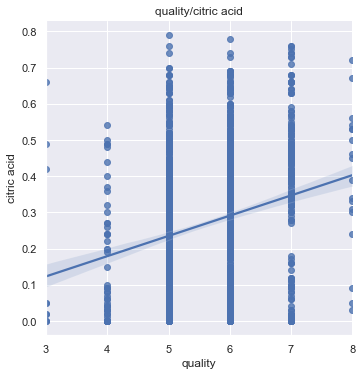

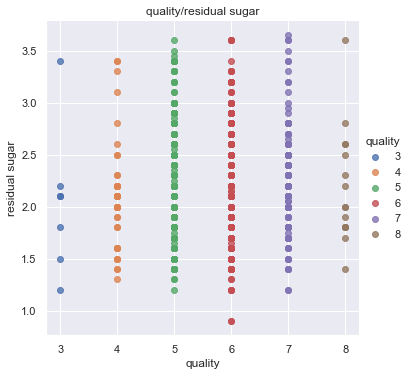

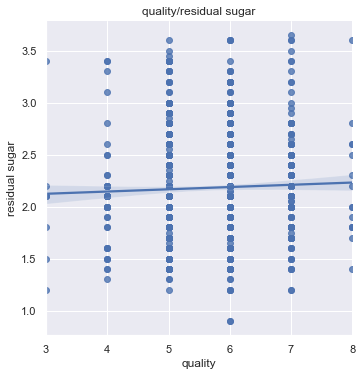

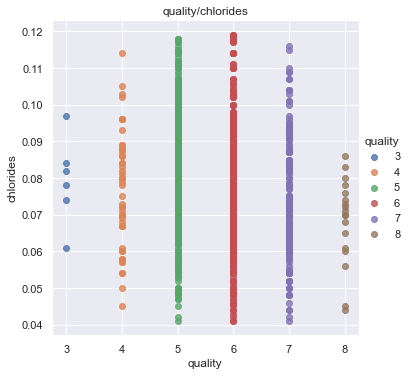

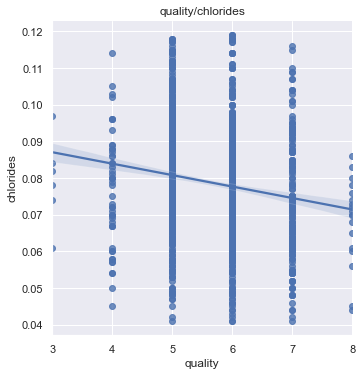

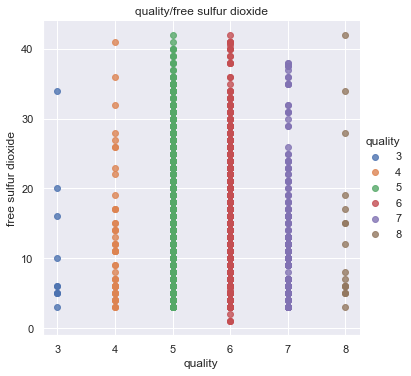

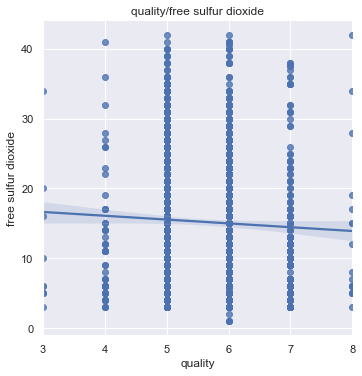

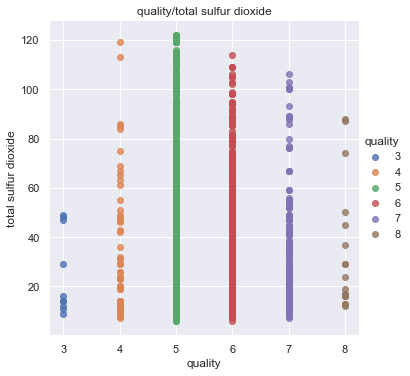

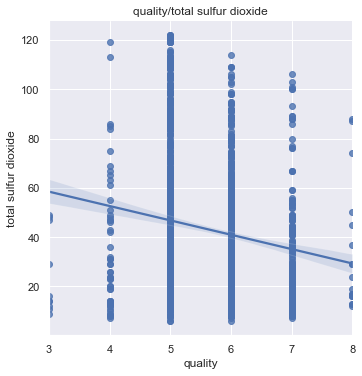

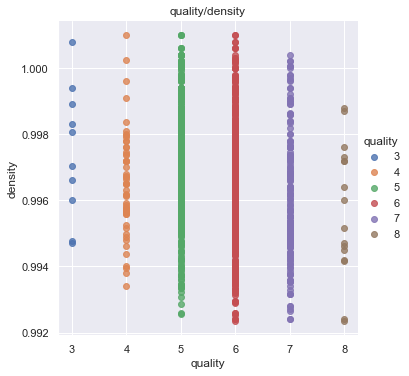

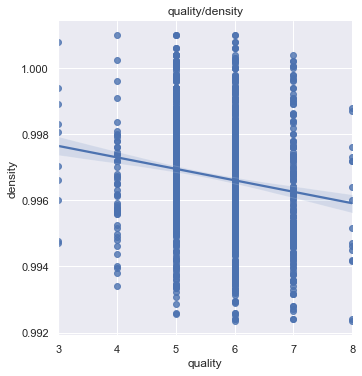

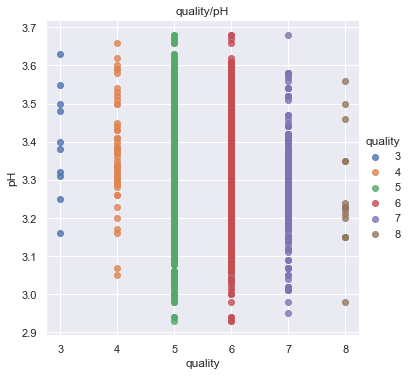

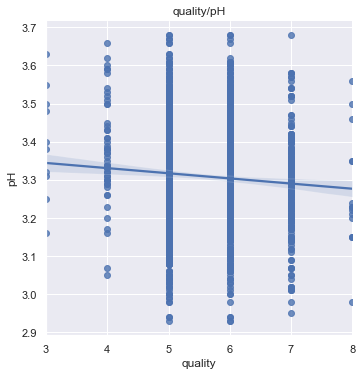

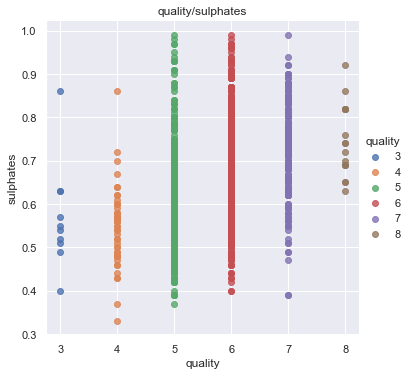

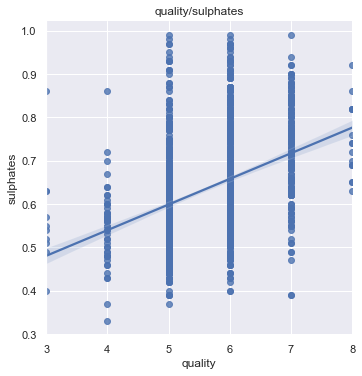

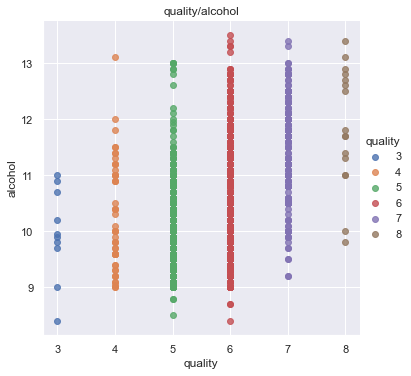

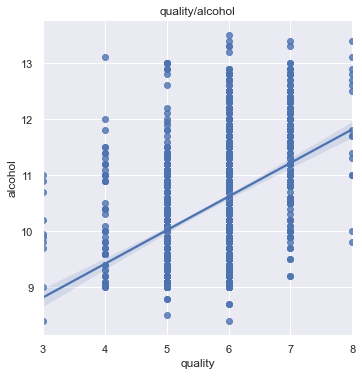

In [21]:
# plotting a graph matrix only with attributes that are well correlated to the target variable

for pl,col in enumerate(list(df2.iloc[:,:11].columns.values)):
    
    sns.lmplot(x='quality',y=col,data=df2, hue = 'quality',fit_reg=False)
    plt.title(f'quality/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close() 
    
    print('\n')
    
    sns.lmplot(x='quality',y=col,data=df2)
    plt.title(f'quality/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close() 
    
    print('\n'*5)
    
    

we see both distribution of single variables on the diagonal with respect to the quality (denoted by the various colours) and relationships between two variables with respect to the quality(denoted by the various colours)

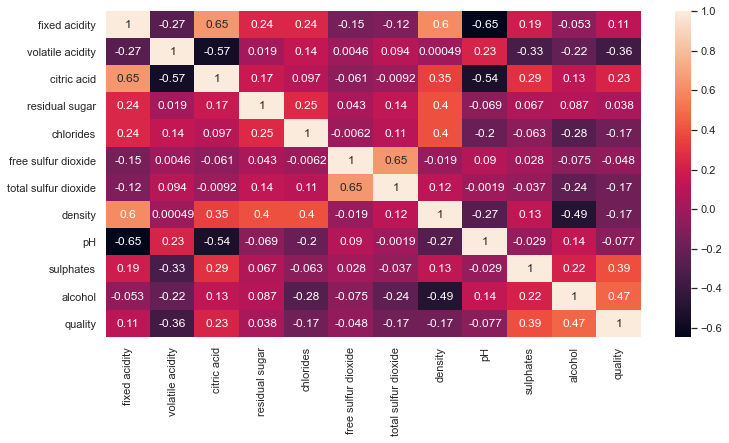

In [22]:
# visual representation of our correlation analysis using the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df2.corr(), annot= True);

## Scaling and Splitting the Data

In [23]:
condition = [(df2['quality']>6),(df2['quality']<=4)]
rating = ['good','bad']
df2['rating'] = np.select(condition,rating,default='average')
df2.rating.value_counts()


average    1319
good        217
bad          63
Name: rating, dtype: int64

In [24]:
df2.head(25)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.500,0.36,NaN,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,average


In [25]:
df2[[('rating'),('quality')]].head(25)

,rating,quality
0,average,5
1,average,5
2,average,5
3,average,6
4,average,5
5,average,5
6,average,5
7,good,7
8,good,7
9,average,5


In [26]:
df2.groupby('rating')['quality'].value_counts()

rating   quality
average  5          681
         6          638
bad      4           53
         3           10
good     7          199
         8           18
Name: quality, dtype: int64

In [27]:
bins = (2, 4, 9)
group_names = ['bad', 'good']
df2['quality'] = pd.cut(df2['quality'], bins = bins, labels = group_names)


df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good,average


In [28]:
df2.head(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,good,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,good,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good,good
9,7.5,0.500,0.36,NaN,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,good,average


In [29]:
dfL = np.array(df2['quality'])
dfL = pd.DataFrame(dfL)
df2['quality'] = dfL.apply(lambda x: x.map({'good':1,'bad':0})) 

In [30]:
df2.head(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,good
9,7.5,0.500,0.36,NaN,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1,average


In [31]:
df2 = df2.drop('rating',axis=1)
df2.head(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,NaN,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1


In [32]:
df2.isnull().sum()

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                   0
dtype: int64

#### As is shown above; applying the 'Outlier Removal Function' has created missing values in the DataSet. I will now fix this by apply the KNN algothrim

In [33]:
x = df2.iloc[:,:-1]
y = df2.iloc[:, -1]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.07,
                                                    random_state = 100)

In [35]:
x_train.isnull().sum()

fixed acidity            47
volatile acidity         18
citric acid               1
residual sugar          144
chlorides               108
free sulfur dioxide      28
total sulfur dioxide     50
density                  41
pH                       34
sulphates                57
alcohol                  12
dtype: int64

In [36]:

x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
874,10.4,0.380,0.46,2.1,0.104,6.0,10.0,0.99664,3.12,0.65,11.8
399,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4
330,10.2,0.360,0.64,2.9,NaN,10.0,41.0,0.99800,3.23,0.66,12.5
1301,6.7,0.860,0.07,2.0,0.100,20.0,57.0,0.99598,3.60,0.74,11.7
204,7.0,0.430,0.36,1.6,0.089,14.0,37.0,0.99615,3.34,0.56,9.2
...,...,...,...,...,...,...,...,...,...,...,...
53,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4
350,10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,NaN,9.1
792,7.1,0.610,0.02,2.5,0.081,17.0,87.0,0.99745,3.48,0.60,9.7


In [37]:
x_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1440.000000,1469.000000,1486.000000,1343.000000,1379.000000,1459.000000,1437.00000,1446.000000,1453.000000,1430.000000,1475.000000
mean,8.160625,0.522968,0.270236,2.179784,0.078761,15.171693,43.17119,0.996735,3.307247,0.637056,10.384904
std,1.509552,0.165794,0.194389,0.447171,0.014879,9.209300,27.27393,0.001666,0.140780,0.121310,1.019716
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.00000,0.992350,2.930000,0.330000,8.400000
25%,7.100000,0.390000,0.092500,1.900000,0.070000,7.000000,22.00000,0.995620,3.210000,0.550000,9.500000
50%,7.800000,0.520000,0.260000,2.100000,0.078000,13.000000,37.00000,0.996730,3.310000,0.620000,10.100000
75%,9.100000,0.630000,0.420000,2.500000,0.087500,21.000000,59.00000,0.997800,3.400000,0.720000,11.000000
max,12.300000,1.010000,0.790000,3.650000,0.119000,42.000000,122.00000,1.001000,3.680000,0.990000,13.500000


In [38]:
x_test.isnull().sum()

fixed acidity            2
volatile acidity         1
citric acid              0
residual sugar          11
chlorides                4
free sulfur dioxide      2
total sulfur dioxide     5
density                  4
pH                       1
sulphates                2
alcohol                  1
dtype: int64

In [39]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1254,7.8,0.700,0.06,1.9,0.079,20.0,35.0,0.99628,3.40,0.69,10.900000
1087,7.9,0.190,0.42,1.6,0.057,18.0,30.0,0.99400,3.29,0.69,11.200000
822,6.7,0.540,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,9.800000
1514,6.9,0.840,0.21,NaN,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333
902,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.800000
...,...,...,...,...,...,...,...,...,...,...,...
964,8.5,0.470,0.27,1.9,0.058,18.0,38.0,0.99518,3.16,0.85,11.100000
1415,6.2,0.580,0.00,1.6,0.065,8.0,18.0,0.99660,3.56,0.84,9.400000
1535,7.0,0.550,0.13,2.2,0.075,15.0,35.0,0.99590,3.36,0.59,9.700000
143,6.3,0.390,0.08,1.7,0.066,3.0,20.0,0.99540,3.34,0.58,9.400000


In [40]:
x_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,110.000000,111.000000,112.000000,101.000000,108.000000,110.000000,107.000000,108.000000,111.000000,110.000000,111.000000
mean,8.188182,0.488604,0.274286,2.180693,0.078694,15.377273,40.663551,0.996732,3.328739,0.628091,10.520270
std,1.572279,0.174314,0.189659,0.476916,0.014756,9.493887,26.421098,0.001689,0.135788,0.116576,1.040159
min,5.000000,0.180000,0.000000,1.400000,0.045000,3.000000,8.000000,0.992400,3.020000,0.390000,8.400000
25%,7.000000,0.350000,0.090000,1.900000,0.068750,7.250000,20.000000,0.995683,3.255000,0.550000,9.600000
50%,7.900000,0.470000,0.260000,2.100000,0.078000,15.000000,33.000000,0.996755,3.320000,0.595000,10.400000
75%,8.975000,0.622500,0.445000,2.500000,0.087000,21.000000,54.500000,0.997800,3.405000,0.687500,11.200000
max,11.800000,0.975000,0.650000,3.400000,0.114000,40.500000,121.000000,1.000300,3.610000,0.970000,12.900000


#### Creating Row and Column Index

In [41]:
index1 = x_train.index
index2 = x_test.index
columns = df2.columns.values[:-1]

## APPLYING KNN

In [42]:
knn = KNNImputer()

In [43]:
x_train = pd.DataFrame(knn.fit_transform(x_train), columns = columns, index = index1)

In [44]:
x_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [45]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
874,10.4,0.380,0.46,2.1,0.1040,6.0,10.0,0.99664,3.12,0.65,11.8
399,8.7,0.765,0.22,2.3,0.0640,9.0,42.0,0.99630,3.10,0.55,9.4
330,10.2,0.360,0.64,2.9,0.0826,10.0,41.0,0.99800,3.23,0.66,12.5
1301,6.7,0.860,0.07,2.0,0.1000,20.0,57.0,0.99598,3.60,0.74,11.7
204,7.0,0.430,0.36,1.6,0.0890,14.0,37.0,0.99615,3.34,0.56,9.2
...,...,...,...,...,...,...,...,...,...,...,...
53,8.6,0.380,0.36,3.0,0.0810,30.0,119.0,0.99700,3.20,0.56,9.4
350,10.7,0.670,0.22,2.7,0.1070,17.0,34.0,1.00040,3.28,0.98,9.9
79,8.3,0.625,0.20,1.5,0.0800,27.0,119.0,0.99720,3.16,0.78,9.1
792,7.1,0.610,0.02,2.5,0.0810,17.0,87.0,0.99745,3.48,0.60,9.7


In [46]:
x_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000,1487.000000
mean,8.158507,0.523284,0.270218,2.183020,0.079003,15.353665,44.366106,0.996749,3.307467,0.641268,10.382269
std,1.495397,0.164964,0.194325,0.430154,0.014604,9.255257,27.713684,0.001659,0.140305,0.121883,1.016212
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.992350,2.930000,0.330000,8.400000
25%,7.100000,0.400000,0.095000,1.900000,0.070000,7.000000,22.000000,0.995640,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.100000,0.079000,13.000000,38.000000,0.996770,3.310000,0.620000,10.100000
75%,9.100000,0.630000,0.420000,2.400000,0.088000,21.000000,62.000000,0.997825,3.400000,0.725000,11.000000
max,12.300000,1.010000,0.790000,3.650000,0.119000,42.000000,122.000000,1.001000,3.680000,0.990000,13.500000


In [47]:
x_test = pd.DataFrame(knn.transform(x_test), columns = columns, index = index2)

In [48]:
x_test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [49]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1254,7.8,0.700,0.06,1.9,0.079,20.0,35.0,0.99628,3.40,0.69,10.900000
1087,7.9,0.190,0.42,1.6,0.057,18.0,30.0,0.99400,3.29,0.69,11.200000
822,6.7,0.540,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,9.800000
1514,6.9,0.840,0.21,1.9,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333
902,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.800000
...,...,...,...,...,...,...,...,...,...,...,...
964,8.5,0.470,0.27,1.9,0.058,18.0,38.0,0.99518,3.16,0.85,11.100000
1415,6.2,0.580,0.00,1.6,0.065,8.0,18.0,0.99660,3.56,0.84,9.400000
1535,7.0,0.550,0.13,2.2,0.075,15.0,35.0,0.99590,3.36,0.59,9.700000
143,6.3,0.390,0.08,1.7,0.066,3.0,20.0,0.99540,3.34,0.58,9.400000


In [50]:
x_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,8.188929,0.489116,0.274286,2.181964,0.078704,15.486607,41.978571,0.996716,3.329571,0.628946,10.517411
std,1.568562,0.173612,0.189659,0.458114,0.014616,9.491129,26.983951,0.001665,0.135462,0.116145,1.035905
min,5.000000,0.180000,0.000000,1.400000,0.045000,3.000000,8.000000,0.992400,3.020000,0.390000,8.400000
25%,7.000000,0.350000,0.090000,1.900000,0.068750,7.750000,20.750000,0.995683,3.257500,0.550000,9.600000
50%,7.900000,0.475000,0.260000,2.100000,0.078000,15.000000,35.000000,0.996745,3.320000,0.600000,10.400000
75%,9.000000,0.621250,0.445000,2.500000,0.087000,21.000000,59.000000,0.997800,3.412500,0.690000,11.200000
max,11.800000,0.975000,0.650000,3.400000,0.114000,40.500000,121.000000,1.000300,3.610000,0.970000,12.900000


In [51]:
stds= StandardScaler()

x_train= stds.fit_transform(x_train)
x_test = stds.transform(x_test)




In [52]:
y_train,y_test

(874     1
 399     1
 330     1
 1301    1
 204     1
        ..
 53      1
 350     1
 79      0
 792     1
 1544    1
 Name: quality, Length: 1487, dtype: int64,
 1254    1
 1087    1
 822     1
 1514    1
 902     1
        ..
 964     1
 1415    1
 1535    1
 143     1
 345     1
 Name: quality, Length: 112, dtype: int64)

## APPLYING VARIOUS MACHINE LEARNING MODELS

In [53]:
def generateClassificationReportTrain(y_true,y_pred):
    print(classification_report(y_true,y_pred));
    print(confusion_matrix(y_true,y_pred));
    print('\n\nTrain Accuracy is: ',
          round(100*accuracy_score(y_true,y_pred),3),'%\n');

In [54]:
def generateClassificationReportTest(y_true,y_pred):
    print(classification_report(y_true,y_pred));
    print(confusion_matrix(y_true,y_pred));
    print('\n\nTest Accuracy is: ',
          round(100*accuracy_score(y_true,y_pred),3),'%\n');

## Decision Tree(Gini)

In [55]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 10).fit(x_train,y_train)
ytrain_pred = clf_gini.predict(x_train)
generateClassificationReportTrain(y_train,ytrain_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00      1429

    accuracy                           1.00      1487
   macro avg       1.00      1.00      1.00      1487
weighted avg       1.00      1.00      1.00      1487

[[  58    0]
 [   0 1429]]


Train Accuracy is:  100.0 %



In [56]:
ytest_pred = clf_gini.predict(x_test)

generateClassificationReportTest(y_test,ytest_pred)

              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.96      0.97      0.97       107

    accuracy                           0.94       112
   macro avg       0.61      0.59      0.59       112
weighted avg       0.93      0.94      0.93       112

[[  1   4]
 [  3 104]]


Test Accuracy is:  93.75 %



## Decision Tree(Entropy)

In [57]:
clf_entropy = DecisionTreeClassifier(criterion ='entropy', random_state = 10).fit(x_train,y_train)
ytrain_pred = clf_entropy.predict(x_train)
generateClassificationReportTrain(y_train,ytrain_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00      1429

    accuracy                           1.00      1487
   macro avg       1.00      1.00      1.00      1487
weighted avg       1.00      1.00      1.00      1487

[[  58    0]
 [   0 1429]]


Train Accuracy is:  100.0 %



In [58]:
ytest_pred = clf_entropy.predict(x_test)

generateClassificationReportTest(y_test,ytest_pred)

              precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       0.97      0.96      0.97       107

    accuracy                           0.94       112
   macro avg       0.65      0.68      0.67       112
weighted avg       0.94      0.94      0.94       112

[[  2   3]
 [  4 103]]


Test Accuracy is:  93.75 %



## Random Forest

In [59]:
rfc = RandomForestClassifier(n_estimators=100, random_state = 10).fit(x_train,y_train)

ytrain_pred = rfc.predict(x_train)
generateClassificationReportTrain(y_train,ytrain_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00      1429

    accuracy                           1.00      1487
   macro avg       1.00      1.00      1.00      1487
weighted avg       1.00      1.00      1.00      1487

[[  58    0]
 [   0 1429]]


Train Accuracy is:  100.0 %



In [60]:
ytest_pred = rfc.predict(x_test)

generateClassificationReportTest(y_test,ytest_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.96      1.00      0.98       107

    accuracy                           0.96       112
   macro avg       0.48      0.50      0.49       112
weighted avg       0.91      0.96      0.93       112

[[  0   5]
 [  0 107]]


Test Accuracy is:  95.536 %



C:\Users\Divinity-PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression

In [61]:
logr = LogisticRegression(max_iter=1000, random_state = 10).fit(x_train,y_train)
ytrain_pred = logr.predict(x_train)
generateClassificationReportTrain(y_train,ytrain_pred)

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        58
           1       0.96      1.00      0.98      1429

    accuracy                           0.96      1487
   macro avg       0.98      0.51      0.51      1487
weighted avg       0.96      0.96      0.94      1487

[[   1   57]
 [   0 1429]]


Train Accuracy is:  96.167 %



In [62]:
ytest_pred = logr.predict(x_test)

generateClassificationReportTest(y_test,ytest_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.96      1.00      0.98       107

    accuracy                           0.96       112
   macro avg       0.48      0.50      0.49       112
weighted avg       0.91      0.96      0.93       112

[[  0   5]
 [  0 107]]


Test Accuracy is:  95.536 %



C:\Users\Divinity-PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Support Vector Machine

In [63]:
svm = SVC(random_state = 10).fit(x_train,y_train)
ytrain_pred = svm.predict(x_train)
generateClassificationReportTrain(y_train,ytrain_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.96      1.00      0.98      1429

    accuracy                           0.96      1487
   macro avg       0.48      0.50      0.49      1487
weighted avg       0.92      0.96      0.94      1487

[[   0   58]
 [   0 1429]]


Train Accuracy is:  96.1 %



C:\Users\Divinity-PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
ytest_pred = svm.predict(x_test)

generateClassificationReportTest(y_test,ytest_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.96      1.00      0.98       107

    accuracy                           0.96       112
   macro avg       0.48      0.50      0.49       112
weighted avg       0.91      0.96      0.93       112

[[  0   5]
 [  0 107]]


Test Accuracy is:  95.536 %



C:\Users\Divinity-PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## So from here; based on the ML models I used in predicting, the models that performed the quite well are:
1. Support Vector Machine
2. Logistic Regression
3. Random Forest